<a href="https://colab.research.google.com/github/Halskii/Machine-Learning/blob/main/cap4611_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cap-4611-spring-21-assignment-1/sample_submission.csv
/kaggle/input/cap-4611-spring-21-assignment-1/train.csv
/kaggle/input/cap-4611-spring-21-assignment-1/test.csv


# The following sections read in the data into pandas dataFrames.

In [ ]:
train_data = pd.read_csv("/kaggle/input/cap-4611-spring-21-assignment-1/train.csv")
train_data.head()

,id,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,0,0,0.647346,0.683820,0.667273,0.610069,0.610069,0.999181,0.797708,0.809538,...,0.845906,0.001164,0.624779,0.610068,0.843976,0.279420,0.026798,0.565193,1,0.030658
1,1,0,0.495247,0.555768,0.544997,0.600600,0.600600,0.999018,0.797449,0.809356,...,0.805535,0.006289,0.622790,0.600600,0.840984,0.282245,0.027232,0.566643,1,0.023030
2,2,0,0.493248,0.544865,0.544890,0.605810,0.605810,0.999011,0.797454,0.809376,...,0.803692,0.002246,0.624613,0.605807,0.840458,0.275849,0.026794,0.565171,1,0.093123
3,3,0,0.315117,0.364261,0.352910,0.619366,0.619366,0.997875,0.795752,0.807775,...,0.713786,0.000459,0.623901,0.619363,0.835870,0.275382,0.026774,0.565073,1,0.148308
4,4,0,0.526642,0.590547,0.578350,0.612866,0.612866,0.999036,0.797590,0.809484,...,0.826240,0.000556,0.624134,0.612867,0.841919,0.277004,0.026791,0.565158,1,0.051906


In [ ]:
test_data = pd.read_csv("/kaggle/input/cap-4611-spring-21-assignment-1/test.csv")
test_data.head()

,id,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,tax Pre-net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,...,net income to total assets,total assets to GNP price,No-credit interval,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,Degree of financial leverage (DFL),Interest coverage ratio( Interest expense to EBIT ),one if net income was negative for the last two year zero otherwise,equity to liability
0,0,0.425876,0.472634,0.475828,0.598856,0.598856,0.998655,0.796918,0.808930,0.303358,...,0.765001,0.000516,0.623654,0.598854,0.837738,0.278789,0.026699,0.564679,1,0.033798
1,1,0.483352,0.548572,0.532255,0.610567,0.610567,0.998993,0.797417,0.809332,0.303522,...,0.803544,0.000792,0.623814,0.610568,0.840849,0.283411,0.027070,0.566210,1,0.021320
2,2,0.557403,0.589294,0.606403,0.628454,0.628454,0.999338,0.797840,0.809662,0.303540,...,0.830134,0.497296,0.624176,0.628453,0.842081,0.276670,0.026791,0.565159,1,0.058915
3,3,0.508214,0.553205,0.557578,0.609305,0.609305,0.999059,0.797462,0.809391,0.303463,...,0.804534,0.001357,0.622863,0.609305,0.840798,0.280778,0.027410,0.567019,1,0.026110
4,4,0.545069,0.612298,0.598854,0.605817,0.604599,0.999014,0.797742,0.809626,0.304046,...,0.834617,0.002530,0.624115,0.605816,0.843064,0.279336,0.026827,0.565322,1,0.031029


# This section gives us box plots of the training data to provide a visual for any outliers in the data.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


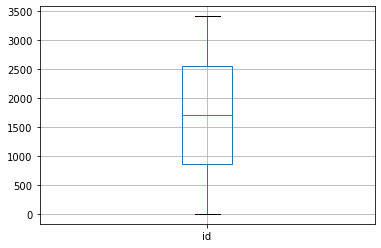

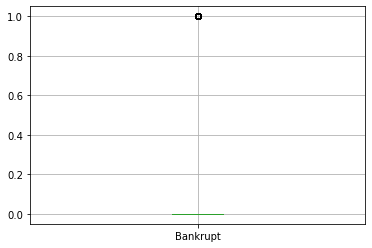

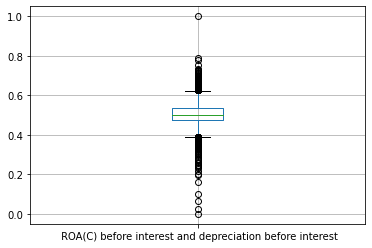

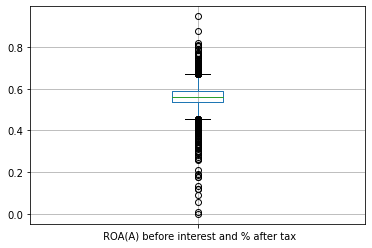

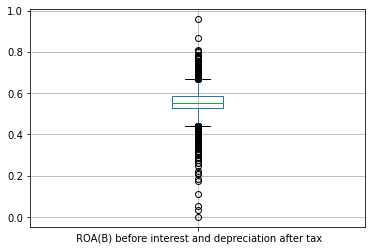

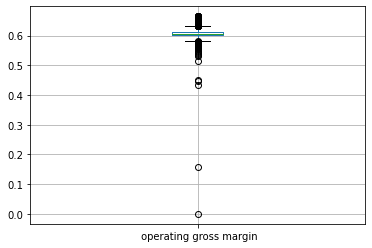

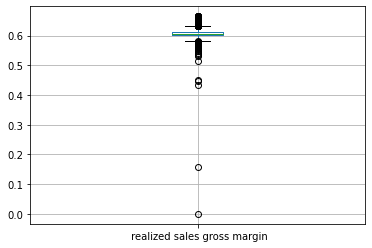

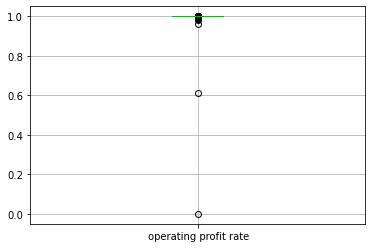

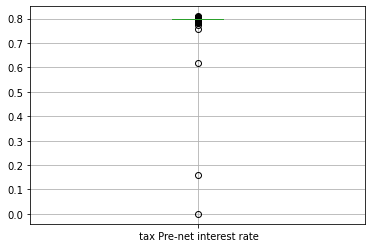

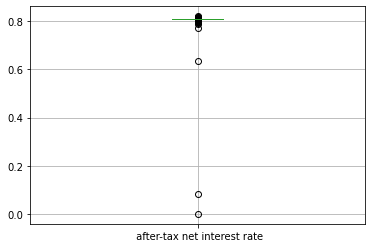

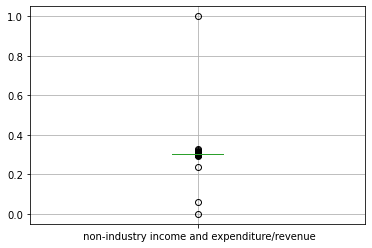

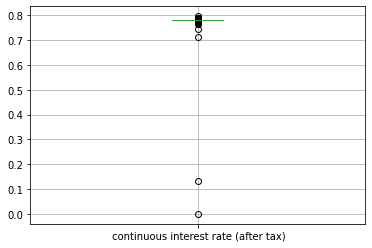

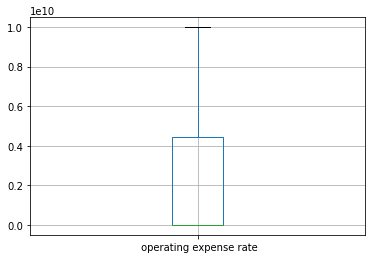

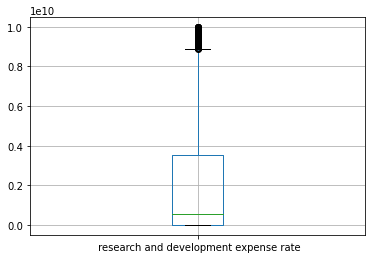

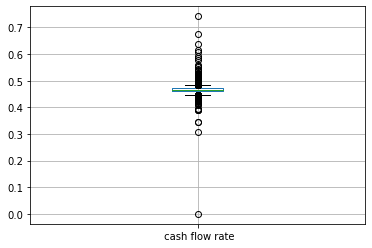

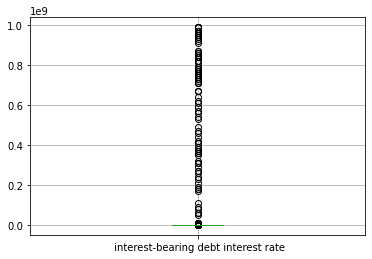

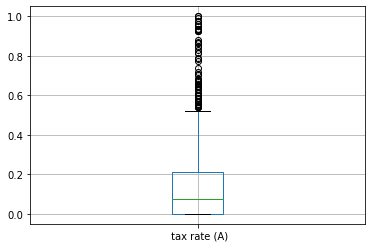

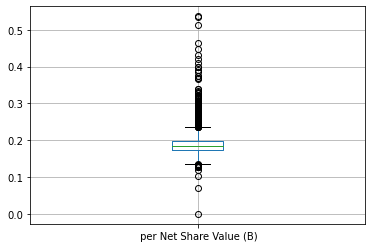

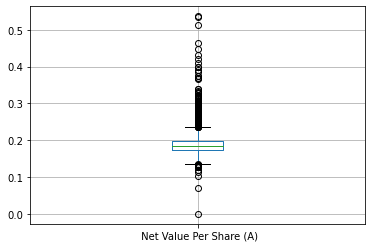

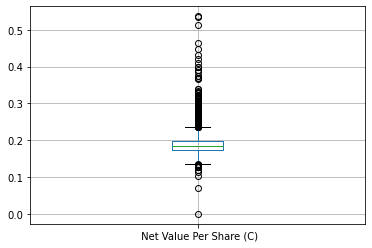

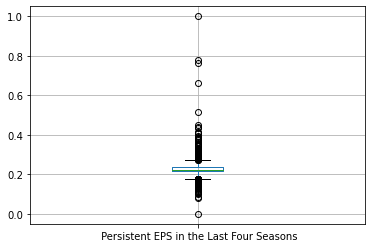

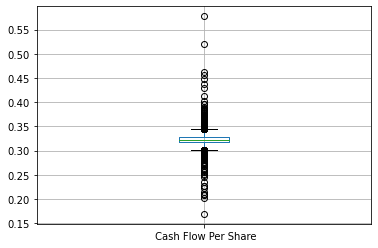

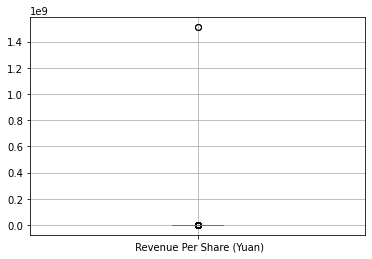

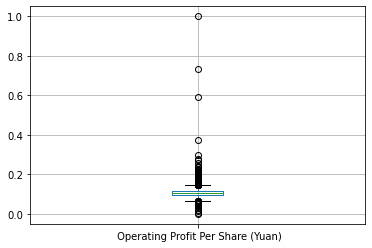

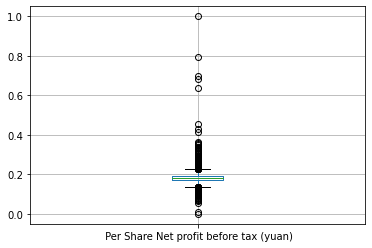

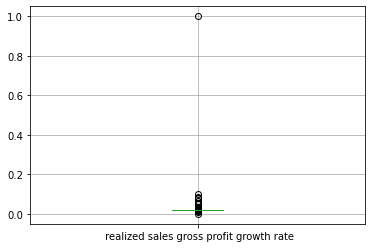

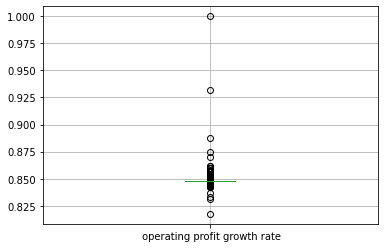

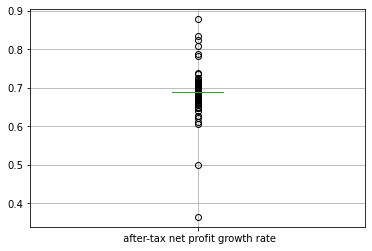

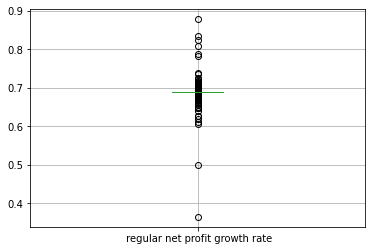

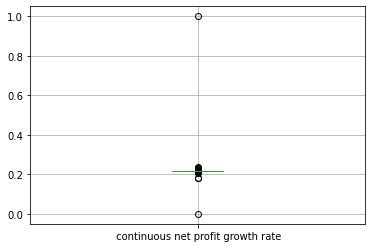

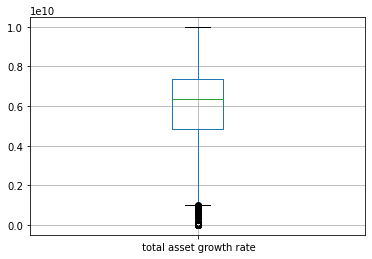

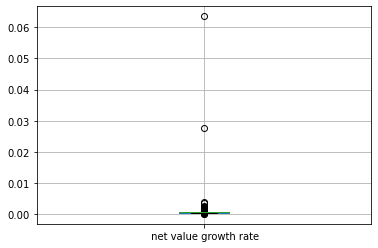

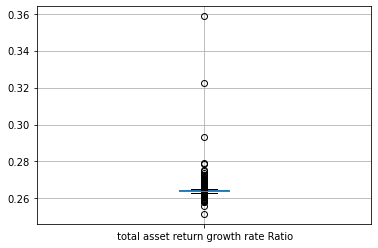

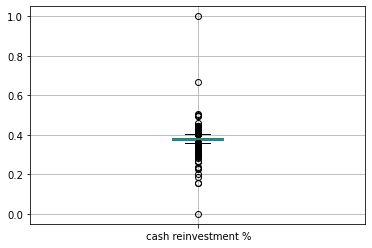

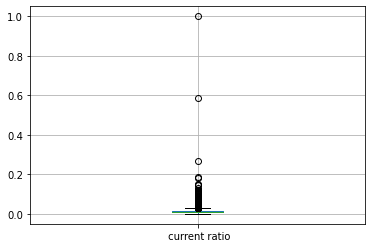

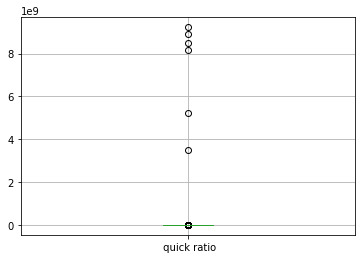

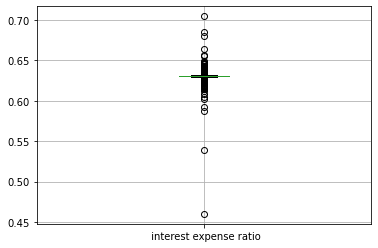

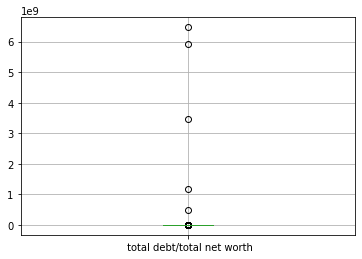

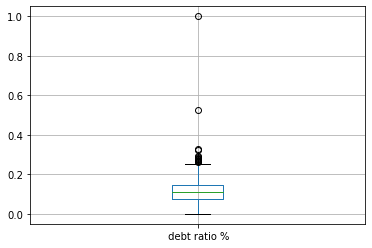

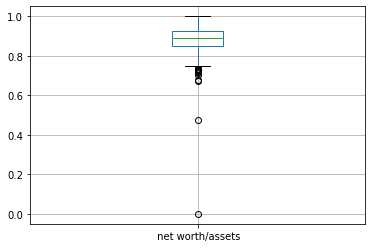

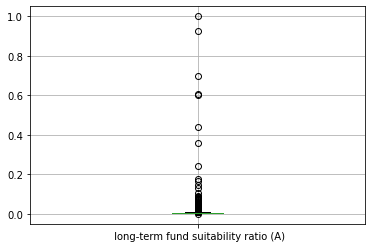

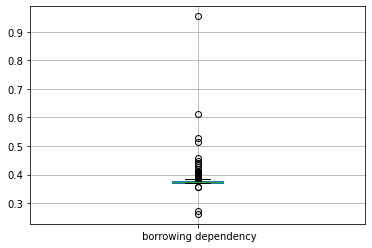

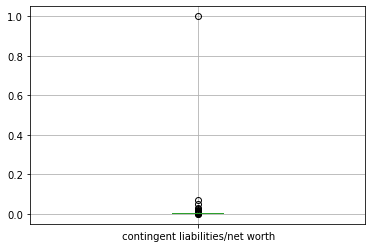

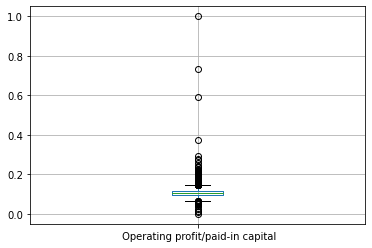

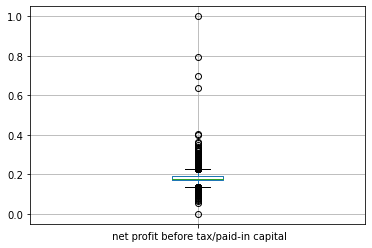

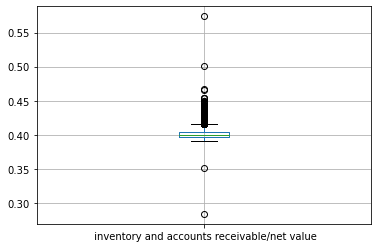

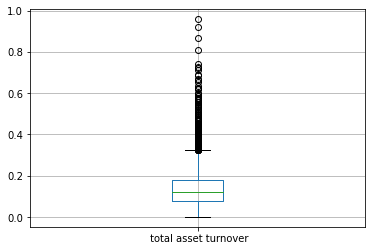

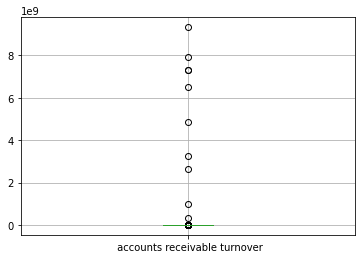

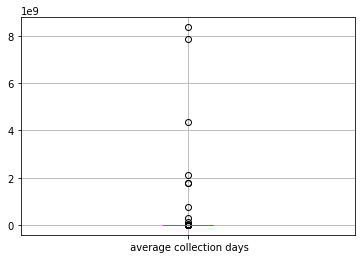

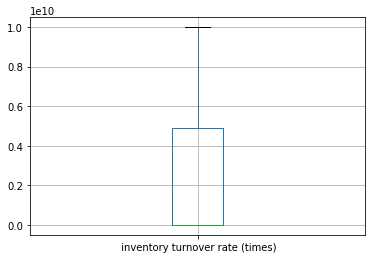

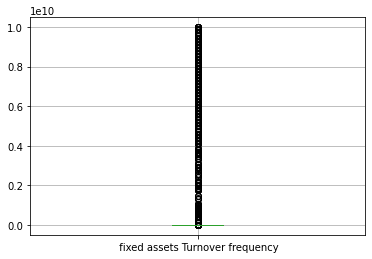

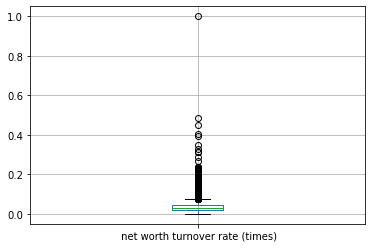

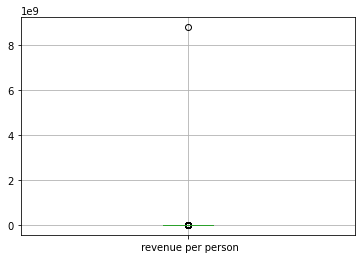

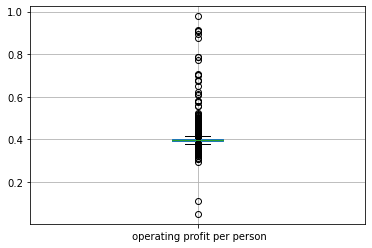

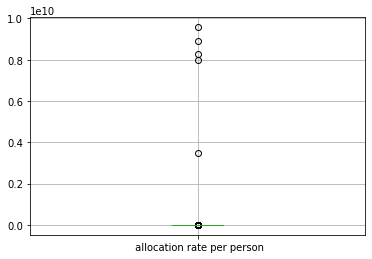

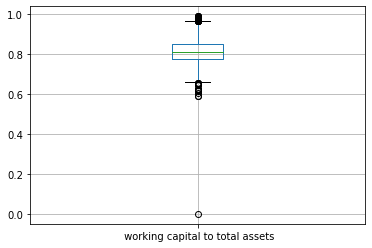

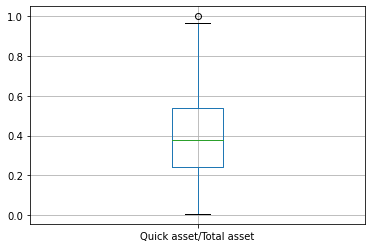

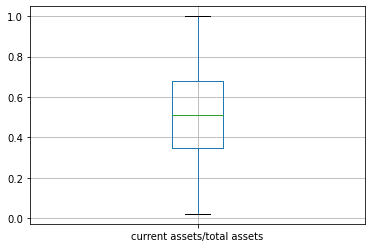

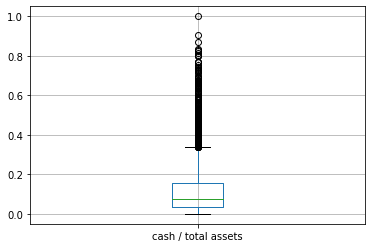

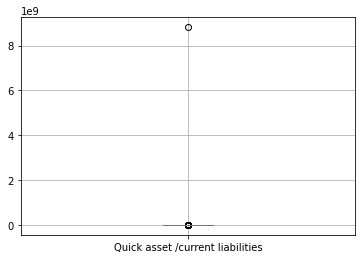

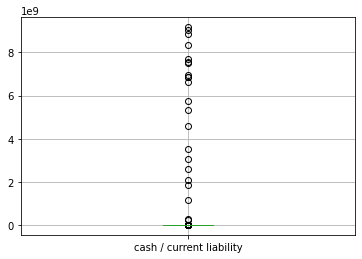

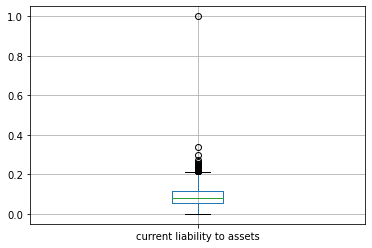

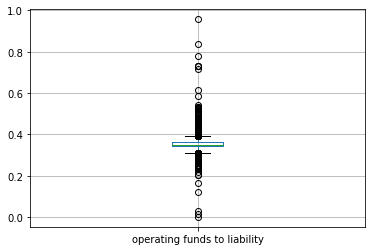

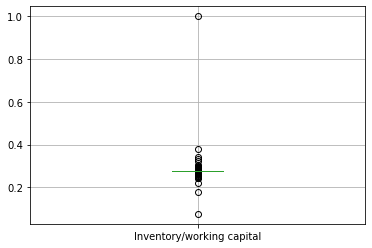

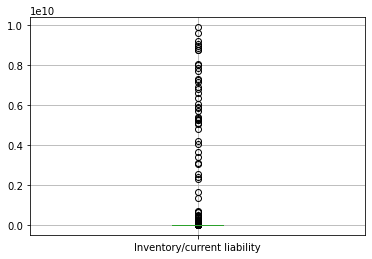

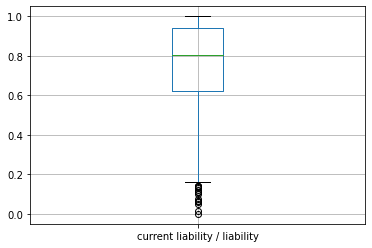

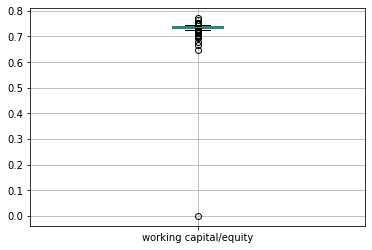

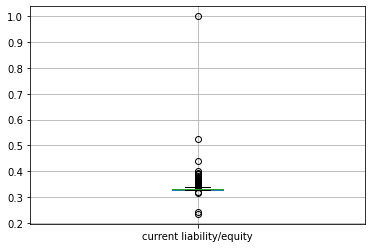

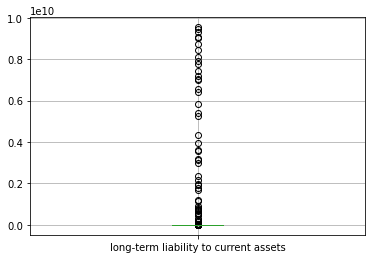

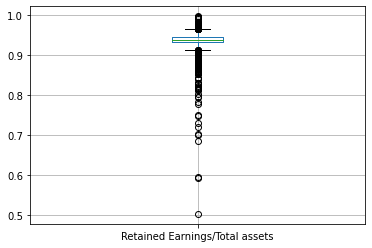

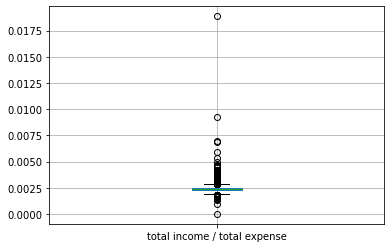

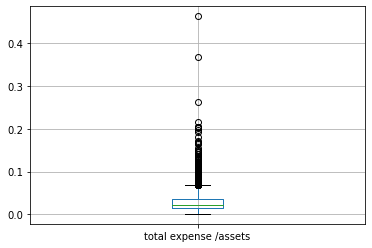

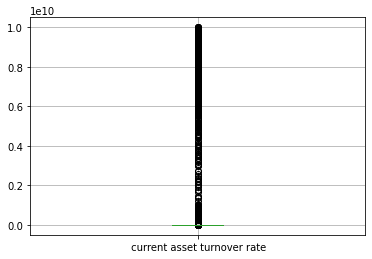

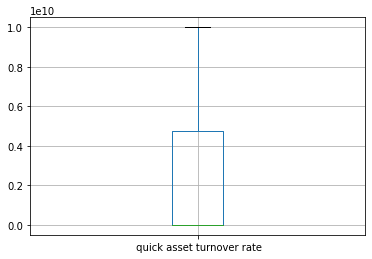

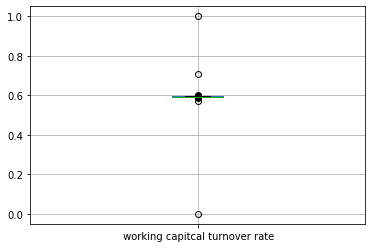

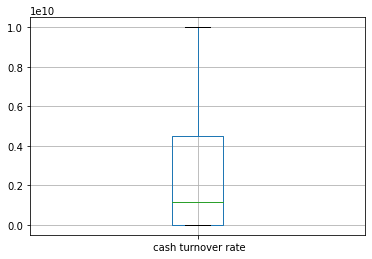

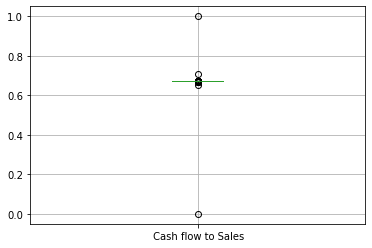

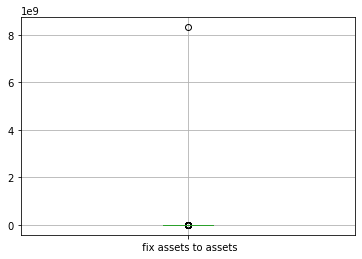

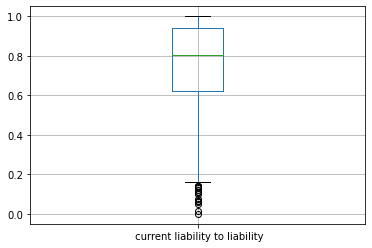

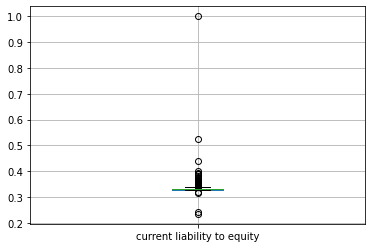

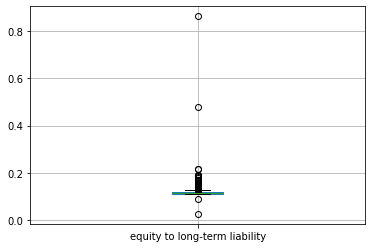

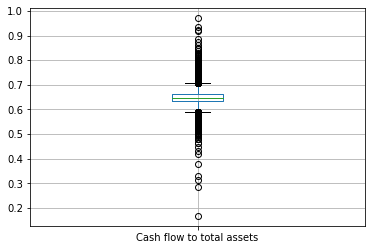

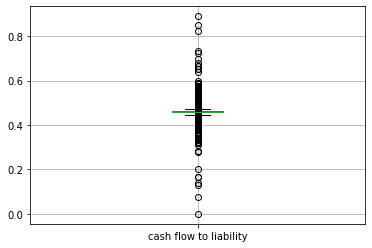

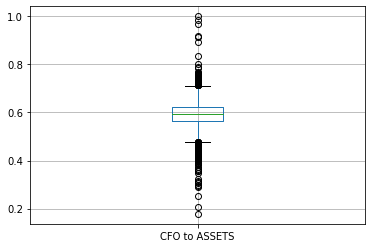

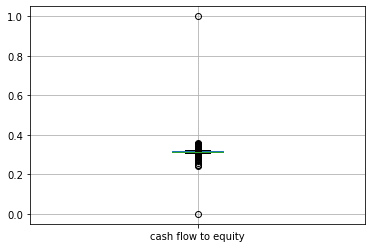

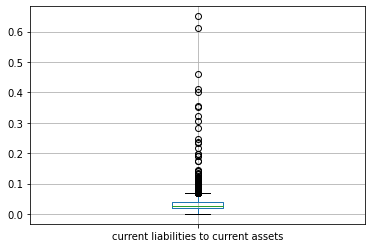

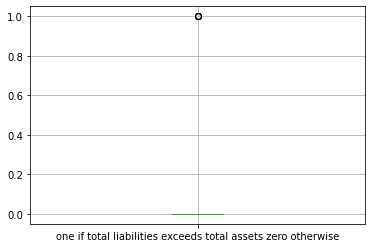

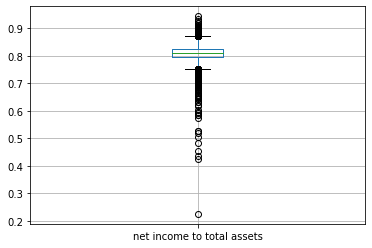

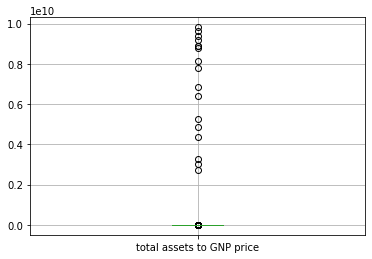

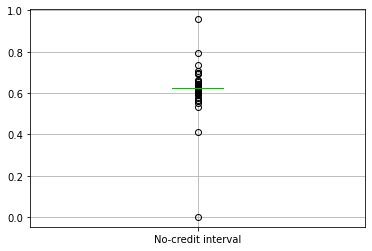

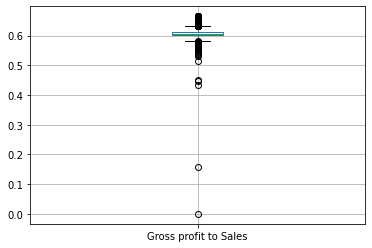

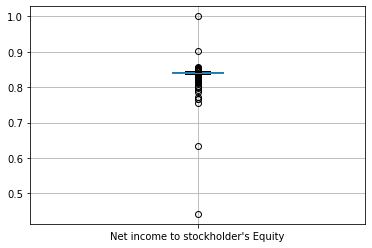

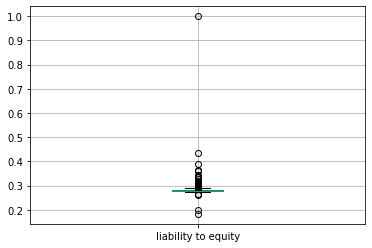

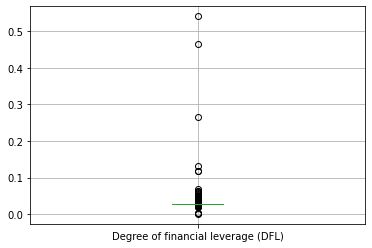

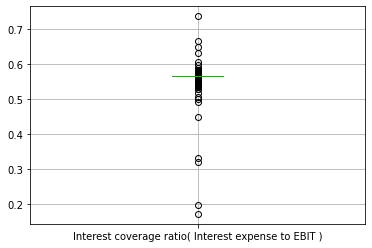

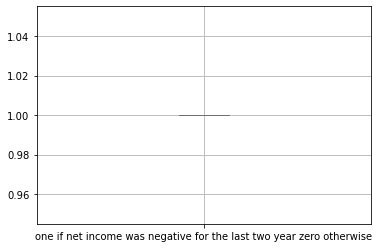

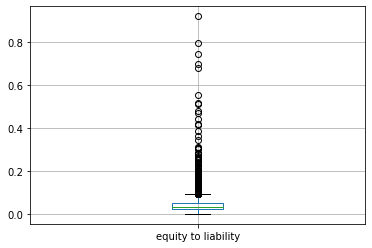

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Boxplots as a visual check for any outliers in the training data.
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

# **The following section removes outliers from the training data using lower and upper quartiles.**

**NOTE**: I've commented this section out because removing the outliers using lower and upper quartiles the way I did lowered my accuracy dramatically. Also because this section is commented out I have changed the NaN removal sections dataframe name to train_data since filtered_train was created in this now commented out code below.

In [ ]:
# Removing binary values temporarily to remove outliers from applicable data in the dataset.
#filtered_train = train_data.loc[:, train_data.columns != 'id']
#filtered_train = filtered_train.loc[:, filtered_train.columns != 'Bankrupt']
#filtered_train = filtered_train.loc[:, filtered_train.columns != 'one if net income was negative for the last two year zero otherwise']
#filtered_train = filtered_train.loc[:, filtered_train.columns != 'one if total liabilities exceeds total assets zero otherwise']

# Sets the lower and upper quartiles for each column.
#low = .0025
#high = .9975
#quant_train = filtered_train.quantile([low, high])
#print(quant_train )

# Removes the values outside of our set quartiles.
#filtered_train = filtered_train.apply(lambda x: x[(x>quant_train.loc[low,x.name]) & (x < quant_train.loc[high,x.name])], axis=0)

# Restores the columns that were taken out prior to outlier removal to the dataset.
#filtered_train = pd.concat([train_data.loc[:,'one if total liabilities exceeds total assets zero otherwise'], filtered_train], axis=1)
#filtered_train = pd.concat([train_data.loc[:,'one if net income was negative for the last two year zero otherwise'], filtered_train], axis=1)
#filtered_train = pd.concat([train_data.loc[:,'Bankrupt'], filtered_train], axis=1)
#filtered_train = pd.concat([train_data.loc[:,'id'], filtered_train], axis=1)

# **The following section checks for NaN values in the training data, and if they are found they're replaced with 0's.**

In [ ]:
# Used the following to check for any NaN values in the given dataframe.
nans = train_data.isnull().sum()
if(np.all((nans == 0))) : print("No NaN values")
else                    : print("Replacing NaN values with zeroes..."); train_data = train_data.fillna(0)

No NaN values


# The following section splits our data and sets up our models.
I chose not to implement normalization, or rather, I implemented scaling in later versions and it brought my accuracy down so I removed it.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = test_data.columns
train_data = train_data.drop(train_data.index[3409])
y_train = train_data['Bankrupt']

x_train, x_test, y_train, y_test = train_test_split(train_data[features], y_train, test_size=.25, random_state=42, stratify=y_train)

tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=7, splitter="best")
tree_model.fit(x_train, y_train)

forest_model = RandomForestClassifier(random_state = 1,n_estimators = 75,min_samples_split = 2) 
forest_model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=75, random_state=1)

# The following section generates predictions and prints out our models respective metrics.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Generates predictions based off the training data on our model.
tree_predictions = tree_model.predict_proba(x_train)[:, 1]
forest_predictions = forest_model.predict_proba(x_train)[:, 1]

# Computes all the accuracy / f1 / roc metrics.
acc_tree = accuracy_score(y_train, tree_predictions.round())
acc_forest = accuracy_score(y_train, tree_predictions.round())
f1_tree = f1_score(y_train, tree_predictions.round())
f1_forest = f1_score(y_train, forest_predictions.round())
roc_tree = roc_auc_score(y_train, tree_predictions)
roc_forest = roc_auc_score(y_train, forest_predictions)

# Prints out the metrics we computed above.
print("Best Tree Model Accuracy: " + str(acc_tree))
print("Best Forest Model Accuracy: " + str(acc_forest))

print("Best Tree Model F1: " + str(f1_tree))
print("Best Forest Model F1: " + str(f1_forest))

print("Best Tree Model ROC: " + str(roc_tree))
print("Best Forest Model ROC: " + str(roc_forest))

Best Tree Model Accuracy: 0.9913928012519562
Best Forest Model Accuracy: 0.9913928012519562
Best Tree Model F1: 0.8493150684931506
Best Forest Model F1: 0.9938650306748467
Best Tree Model ROC: 0.9976807579312656
Best Forest Model ROC: 1.0


# This final section outputs our best model's predictions of the test data to a csv file.

In [ ]:
# Determines which model to use for our submission based on the ROC scores.
if (roc_tree > roc_forest): predictions = tree_model.predict_proba(test_data)[:, 1]
else:                       predictions = forest_model.predict_proba(test_data)[:, 1]

# Outputs the chosen predictions to a CSV to be submitted.
output = pd.DataFrame({'id': test_data.id, 'Bankrupt': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
